Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your name below:

In [13]:
NAME = "Victor Shi"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/d/18wwyjGku2HYfgDX9Vez64lGHz31E_PfbpmAdfb7ly6M/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- Questions can be either autograded and manually graded.
- The type of question and the points they carry are indicated in each question cell
- An autograded question has 3 cells
     - **Question cell** : Read only cell containing the question
     - **Code Cell** : This is where you write the code
     - **Grading cell** : This is where the grading occurs, and **you are required not to edit this cell**
- Manually graded questions only have the question and code cells.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out! 
- You can delete the `raise NotImplementedError()` for all manually graded questions.
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to canvas. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding! 

In [2]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')



#DOWNLOADING DATASET
!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
!unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

--2020-09-09 08:16:02--  http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
Resolving people.ischool.berkeley.edu (people.ischool.berkeley.edu)... 128.32.78.16
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip [following]
--2020-09-09 08:16:02--  https://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12350863 (12M) [application/zip]
Saving to: ‘yelp_reviewers.zip’

yelp_reviewers.zip  100%[===================>]  11.78M  7.83MB/s    in 1.5s    

2020-09-09 08:16:04 (7.83 MB/s) - ‘yelp_reviewers.zip’ saved [12350863/12350863]

Archive:  yelp_reviewers.zip
  inflating: yelp_reviewers.csv      


In [ ]:
df.head(10)

,user_id,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16s,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
129451,kIWQXgjmVdgEs9BOgr8G5A,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,7,510.00,0,0.000000,0.000000,3.000,0.013725,0.000000,0,0,0,0.000,0,0,3.0,0.000,0.00,0.00,0.000000,3,experienced,no,0.000,13,3,0.000000,101.000000,0,0,NaN,3.000
116706,fXU_-5DBmNlGhI8fbX-2vQ,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,10,132.00,0,0.000000,0.000000,1.000,0.045455,0.000000,1,1,0,0.000,0,0,0.0,0.000,1.00,0.00,0.000000,1,experienced,no,0.000,35,1,0.007576,23.000000,0,0,0.00,1.000
144394,prF_lbKywPnZhNqvJOOaDw,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,9,1792.00,0,0.000000,0.000000,3.000,0.027344,0.000000,1,1,0,0.000,0,0,12.0,1.000,1.00,1.00,0.000000,3,experienced,no,2.000,36,3,0.001685,363.000000,0,0,NaN,3.000
24699,8GHUeOm807bI5Qh4X3CHBA,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,8,283.00,0,0.000000,0.000000,5.000,0.017668,0.000000,0,0,0,0.000,0,0,1.0,0.000,0.00,0.00,0.000000,5,experienced,no,0.000,33,5,0.000000,50.000000,0,0,2.00,5.000
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,0.69,0.00,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875,0.022989,0.330719,2,6,0,1.375,1,0,4.5,0.125,0.75,1.00,0.192489,5,experienced,no,0.375,8,39,0.001755,91.072917,4,0,1.00,4.875
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.00,0.00,0.69,25.00,25.00,50.00,10,532.50,0,1.414214,0.003756,3.000,0.024413,1.000000,0,0,0,2.000,1,0,5.5,0.000,0.00,0.00,0.205055,2,experienced,no,1.000,22,6,0.000000,46.500000,0,3,0.00,3.000
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,NaN,NaN,0.00,0.00,0.00,100.00,5,2018.00,0,0.000000,0.000496,5.000,0.026759,0.000000,2,1,0,1.000,0,0,12.0,0.000,1.00,1.00,0.049554,5,experienced,no,1.000,37,5,0.000498,197.000000,0,0,0.00,5.000
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,NaN,NaN,1.39,0.00,0.00,100.00,6,1303.40,1,1.673320,0.000614,3.600,0.020715,1.496663,3,3,0,0.800,2,0,12.8,1.000,0.60,0.40,0.086515,5,experienced,no,1.400,14,18,0.001578,167.000000,1,0,1.25,3.600
45130,FmQnPYMuR6ZwkmZ6D0dAAg,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,6,62.00,0,0.000000,0.000000,2.000,0.016129,0.000000,0,0,0,0.000,0,0,0.0,0.000,0.00,0.00,0.000000,2,experienced,no,0.000,10,2,0.000000,12.000000,0,0,0.00,2.000
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.08,1.61,2.56,30.77,19.23,50.00,9,1047.50,2,1.281740,0.003103,3.750,0.030788,1.198958,3,8,0,3.250,0,0,5.5,1.125,1.00,0.25,0.137523,5,experienced,no,0.500,3,30,0.009861,91.552083,1,13,4.00,3.750


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. 


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder.


In [ ]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q1(df):
    all_k = np.arange(2, 9)
    init = -1
    num_k = 0
    comb_q = df[['q4', 'q5', 'q6']].to_numpy()
    for x in all_k:
      kmeanModel = KMeans(n_clusters=x, random_state=42).fit(comb_q)
      score = silhouette_score(comb_q, kmeanModel.labels_)
      if init < score:
        init = score
        num_k = x
    return init, num_k


print(q1(df))

(0.9863463723648682, 2)


What is the best choice of k? 

In [ ]:
# YOUR ANSWER HERE
k = 2 
k

2

### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8. 

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q2(df):
    all_k = np.arange(2, 9)
    init = -1
    num_k = 0
    comb_q = df[['q7', 'q8', 'q9', 'q10']].dropna().to_numpy()
    for x in all_k:
      kmeanModel = KMeans(n_clusters=x, random_state=42).fit(comb_q)
      score = silhouette_score(comb_q, kmeanModel.labels_)
      if init < score:
        init = score
        num_k = x
    return init, num_k 
print(q2(df))

(0.41900743174392746, 2)


What is the best choice of k? 

In [ ]:
# YOUR ANSWER HERE
k = 2
k

2

### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8. 

In [120]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q3(df):
    all_k = np.arange(2, 9)
    init = -1
    num_k = 0
    comb_q = df[['q11', 'q12', 'q13']].dropna().to_numpy()
    for x in all_k:
      kmeanModel = KMeans(n_clusters=x, random_state=42).fit(comb_q)
      score = silhouette_score(comb_q, kmeanModel.labels_)
      if init < score:
        init = score
        num_k = x
    return init, num_k 
print(q3(df))

(0.656854772699376, 8)


What is the best choice of k?

In [ ]:
# YOUR ANSWER HERE
k = 8
k

8

### Question 4 `(1 point)`
Consider the best clustering (i.e., best value of K) from Question 3 and list the number of data points in each cluster.

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an dictionary. Eg : {0:1000,1:500,2:1460}
def q4(df):
    comb_q = df[['q11', 'q12', 'q13']].dropna().to_numpy()
    kmeanModel = KMeans(n_clusters=8, random_state=42).fit(comb_q) 
    label = kmeanModel.labels_
    cluster_dict = {x: len(label[label == x]) for x in np.arange(8)}
    return cluster_dict

In [ ]:
#This is an autograded cell, do not edit
print(q4(df))

{0: 3307, 1: 1632, 2: 2862, 3: 9848, 4: 5723, 5: 3405, 6: 1192, 7: 2140}


### Question 5 `(1 point)`
Consider the best cluster from Question 3. Were there clusters that represented very funny but useless reviewers (check column definitions for columns corresponding to funny, useless etc)?  If so, print the center of that cluster.

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q5(df):
    comb_q = df[['q11', 'q12', 'q13']].dropna().to_numpy()
    kmeanModel = KMeans(n_clusters=8, random_state=42).fit(comb_q)
    centroids = kmeanModel.cluster_centers_
    index = np.argmax([x[1] - x[2] for x in centroids])

    return centroids[index]
    
print(q5(df))
   

[ 1.13148897 98.30148897  0.56707721]


In [ ]:
#This is an autograded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

[ 1.1 98.3  0.6]


### Question 6 `(1 point)`
Consider the best clustering from Question 3. What was the centroid of the cluster that represented relatively equal strength in all voting categories?

In [ ]:
#Make sure you return the answer value in this function
def q6(df):
    comb_q = df[['q11', 'q12', 'q13']].dropna().to_numpy()
    kmeanModel = KMeans(n_clusters=8, random_state=42).fit(comb_q)
    centroids = kmeanModel.cluster_centers_
    index = np.argmin([np.std(x) for x in centroids])
    return centroids[index]

In [ ]:
#This is an autograded cell, do not edit
print(q6(df))


[31.44817308 30.39612587 38.15302273]


### Question 7 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
#Make sure you return the answer value in this function
#The return value must be a float
def q7(df):
    comb_q = df[['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna().to_numpy()
    kmeanModel = KMeans(n_clusters=5, random_state=42).fit(comb_q)
    score = silhouette_score(comb_q, kmeanModel.labels_)
    return score

In [ ]:
#This is an autograded cell, do not edit
print(q7(df))

0.5481158706623568


### Question 8 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).

What was the average q3 among the points in each of the clusters?

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q8(df):
    df_q8 = df[['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
    comb_q = df_q8.to_numpy()
    kmeanModel = KMeans(n_clusters=5, random_state=42).fit(comb_q)
    df_q8['label'] = kmeanModel.labels_
    df_q8['q3'] = np.exp(df_q8['q7'])
    return df_q8.groupby('label')['q3'].mean()

In [ ]:
#This is an autograded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

label
0    7.3
1    4.9
2    6.6
3    2.4
4    6.9
Name: q3, dtype: float64


### Question 9 `(2 points)`
**This question will be manually graded.**

Cluster the dataset using all features in the dataset

We can drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features. Let's do that now.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [23]:
df.isna().sum()
# YOUR CODE HERE

user_id        0
q3             0
q4             0
q5             0
q6             0
q7             0
q8         35280
q9         36743
q10        24338
q11        21383
q12        21383
q13        21383
q14            0
q15            0
q16a           0
q16b           0
q16c           0
q16d           0
q16e           0
q16f           0
q16g           0
q16h           0
q16i           0
q16j           0
q16k           0
q16l           0
q16m           0
q16n           0
q16o           0
q16p           0
q16q           0
q16r           0
q16s           0
q16t           0
q16u           0
q16v           0
q16w           0
q16x           0
q16y           0
q16z           0
q16aa          0
q16ab      14469
q16ac          0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values. Let's see what the impact is of removing the two columns with the most null values.

In [24]:
top_columns = df.isna().sum().nlargest(2).index.values
df_cleaned = df.drop(top_columns, axis = 1).dropna()
df_cleaned
# YOUR CODE HERE

,user_id,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16s,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875000,0.022989,0.330719,2,6,0,1.375000,1,0,4.500000,0.125000,0.750000,1.000000,0.192489,5,experienced,no,0.375000,8,39,0.001755,91.072917,4,0,1.000000,4.875000
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.69,25.00,25.00,50.00,10,532.50,0,1.414214,0.003756,3.000000,0.024413,1.000000,0,0,0,2.000000,1,0,5.500000,0.000000,0.000000,0.000000,0.205055,2,experienced,no,1.000000,22,6,0.000000,46.500000,0,3,0.000000,3.000000
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,0.00,0.00,0.00,100.00,5,2018.00,0,0.000000,0.000496,5.000000,0.026759,0.000000,2,1,0,1.000000,0,0,12.000000,0.000000,1.000000,1.000000,0.049554,5,experienced,no,1.000000,37,5,0.000498,197.000000,0,0,0.000000,5.000000
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,1.39,0.00,0.00,100.00,6,1303.40,1,1.673320,0.000614,3.600000,0.020715,1.496663,3,3,0,0.800000,2,0,12.800000,1.000000,0.600000,0.400000,0.086515,5,experienced,no,1.400000,14,18,0.001578,167.000000,1,0,1.250000,3.600000
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.56,30.77,19.23,50.00,9,1047.50,2,1.281740,0.003103,3.750000,0.030788,1.198958,3,8,0,3.250000,0,0,5.500000,1.125000,1.000000,0.250000,0.137523,5,experienced,no,0.500000,3,30,0.009861,91.552083,1,13,4.000000,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,09cpNEc8L-jr9R8-e7cJuA,6,1,2,2,1.79,0.69,20.00,40.00,40.00,9,2232.67,1,1.632993,0.000373,2.666667,0.027844,1.490712,0,3,0,0.833333,-1,1,7.500000,1.333333,0.500000,2.166667,0.016740,1,experienced,no,1.166667,10,16,0.001286,362.916667,0,0,2.500000,2.666667
69511,OrtDTPj1J2injmWcHyTyWw,3,1,2,8,1.10,2.08,9.09,18.18,72.73,9,781.33,0,0.577350,0.004693,4.333333,0.036689,0.471405,1,2,0,3.666667,2,0,4.666667,0.000000,0.666667,0.000000,0.615856,4,experienced,no,0.666667,25,13,0.003016,60.111111,1,0,1.333333,4.333333
77193,RjjsMfDoxbwMVPi-DLvftQ,19,2,2,7,2.94,1.95,18.18,18.18,63.64,11,254.89,1,1.694504,0.002271,3.263158,0.033037,1.649309,3,11,0,0.578947,4,1,1.000000,0.526316,0.578947,0.000000,0.262505,5,experienced,yes,0.315789,12,62,0.018841,41.166667,0,3,0.500000,3.263158
88687,W21PBCWu59Bo5LRv9-sYNg,8,0,1,5,2.08,1.61,0.00,16.67,83.33,8,300.38,3,1.356203,0.002497,3.875000,0.023720,1.268611,2,0,0,0.750000,0,0,0.500000,0.125000,0.000000,0.000000,0.137155,4,experienced,no,0.250000,34,31,0.000000,36.041667,0,0,0.347826,3.875000


By removing two features, we effectively have double the number of rows remaining. That's pretty good.  
Now, let's preprocess categorical variables into dummy values.

In [25]:
df_dummy = pd.get_dummies(df_cleaned, columns=['q16s', 'q16t'])
df_dummy
# pd.get_dummies(df['q16l'])
# YOUR CODE HERE

,user_id,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac,q16s_experienced,q16s_freshman,q16t_no,q16t_yes
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875000,0.022989,0.330719,2,6,0,1.375000,1,0,4.500000,0.125000,0.750000,1.000000,0.192489,5,0.375000,8,39,0.001755,91.072917,4,0,1.000000,4.875000,1,0,1,0
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.69,25.00,25.00,50.00,10,532.50,0,1.414214,0.003756,3.000000,0.024413,1.000000,0,0,0,2.000000,1,0,5.500000,0.000000,0.000000,0.000000,0.205055,2,1.000000,22,6,0.000000,46.500000,0,3,0.000000,3.000000,1,0,1,0
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,0.00,0.00,0.00,100.00,5,2018.00,0,0.000000,0.000496,5.000000,0.026759,0.000000,2,1,0,1.000000,0,0,12.000000,0.000000,1.000000,1.000000,0.049554,5,1.000000,37,5,0.000498,197.000000,0,0,0.000000,5.000000,1,0,1,0
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,1.39,0.00,0.00,100.00,6,1303.40,1,1.673320,0.000614,3.600000,0.020715,1.496663,3,3,0,0.800000,2,0,12.800000,1.000000,0.600000,0.400000,0.086515,5,1.400000,14,18,0.001578,167.000000,1,0,1.250000,3.600000,1,0,1,0
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.56,30.77,19.23,50.00,9,1047.50,2,1.281740,0.003103,3.750000,0.030788,1.198958,3,8,0,3.250000,0,0,5.500000,1.125000,1.000000,0.250000,0.137523,5,0.500000,3,30,0.009861,91.552083,1,13,4.000000,3.750000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,09cpNEc8L-jr9R8-e7cJuA,6,1,2,2,1.79,0.69,20.00,40.00,40.00,9,2232.67,1,1.632993,0.000373,2.666667,0.027844,1.490712,0,3,0,0.833333,-1,1,7.500000,1.333333,0.500000,2.166667,0.016740,1,1.166667,10,16,0.001286,362.916667,0,0,2.500000,2.666667,1,0,1,0
69511,OrtDTPj1J2injmWcHyTyWw,3,1,2,8,1.10,2.08,9.09,18.18,72.73,9,781.33,0,0.577350,0.004693,4.333333,0.036689,0.471405,1,2,0,3.666667,2,0,4.666667,0.000000,0.666667,0.000000,0.615856,4,0.666667,25,13,0.003016,60.111111,1,0,1.333333,4.333333,1,0,1,0
77193,RjjsMfDoxbwMVPi-DLvftQ,19,2,2,7,2.94,1.95,18.18,18.18,63.64,11,254.89,1,1.694504,0.002271,3.263158,0.033037,1.649309,3,11,0,0.578947,4,1,1.000000,0.526316,0.578947,0.000000,0.262505,5,0.315789,12,62,0.018841,41.166667,0,3,0.500000,3.263158,1,0,0,1
88687,W21PBCWu59Bo5LRv9-sYNg,8,0,1,5,2.08,1.61,0.00,16.67,83.33,8,300.38,3,1.356203,0.002497,3.875000,0.023720,1.268611,2,0,0,0.750000,0,0,0.500000,0.125000,0.000000,0.000000,0.137155,4,0.250000,34,31,0.000000,36.041667,0,0,0.347826,3.875000,1,0,1,0


Now, normalize the remaining values

In [28]:
# YOUR CODE HERE
df_dummy = df_dummy.drop(labels=['user_id'], axis=1)
df_norm = normalize(df_dummy)
df_norm

array([[0.01184608, 0.00296152, 0.00148076, ..., 0.        , 0.00148076,
        0.        ],
       [0.00371281, 0.0018564 , 0.0018564 , ..., 0.        , 0.0018564 ,
        0.        ],
       [0.0004925 , 0.        , 0.        , ..., 0.        , 0.0004925 ,
        0.        ],
       ...,
       [0.06886256, 0.00724869, 0.00724869, ..., 0.        , 0.        ,
        0.00362435],
       [0.02516117, 0.        , 0.00314515, ..., 0.        , 0.00314515,
        0.        ],
       [0.01288933, 0.02005007, 0.01575362, ..., 0.        , 0.00143215,
        0.        ]])

Using the the `sum of within cluster variance` metric with the elbow method what was the best k?

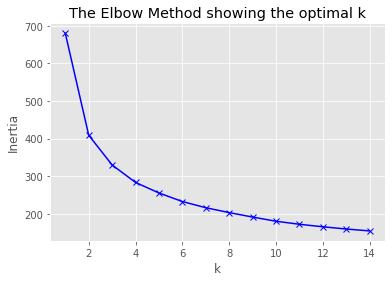

From the plot below, the best k determined by the elbow method is  2


In [31]:
ks = np.arange(1, 15)
inertia = []
for k in ks:
  kmeansModel = KMeans(n_clusters=k, random_state=42).fit(df_norm)
  inertia.append(kmeansModel.inertia_)
plt.plot(ks, inertia, '-bx')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print("From the plot below, the best k determined by the elbow method is ",  2)

In [91]:
temp = np.array(inertia)
temp

array([749665.75834948, 678987.49036229, 630644.91269882, 593585.14818322,
       562457.91633656, 537341.54491957, 519423.20971183, 502950.96276032,
       489149.22055978, 475244.90205725])

In [93]:
#Since after k = 2 the inertia tends to change slowly, k = 2 should be a good choice for number of clusters. 
inertia_ = inertia[1:]
inertia_.append(0)
diff = temp - inertia_
print(diff)

[ 70678.26798719  48342.57766347  37059.7645156   31127.23184667
  25116.37141699  17918.33520774  16472.24695151  13801.74220054
  13904.31850252 475244.90205725]


### Question 10 `(1 points)`
**This question will be manually graded.**

For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe in short the question, and how clustering can answer that question.


In [ ]:
#How many different types of review habits do reviewers exhibit. We can cluster the features 
#related to reviewer behavior and find the best k value, which is the number of review habit types.
#In this case, there are 2 different types of reviewers. 
all_k = np.arange(2, 9)
init = -1
num_k = 0
scores = []
df_behave = df.iloc[:, 15:31].drop('q16l', axis = 1)
df_behave = (df_behave - df_behave.mean())/df_behave.std()
df_behave = df_behave.to_numpy()
for x in all_k:
    kmeanModel = KMeans(n_clusters=x, random_state=42).fit(df_behave)
    score = silhouette_score(df_behave, kmeanModel.labels_)
    scores.append(score)
    if init < score:        
      init = score
      num_k = x
print(init, num_k)
print(scores)

0.20846417336292583 2
[0.20846417336292583, 0.20837869692703667, 0.1850527989500114, 0.1967618604823264, 0.17763375108994423, 0.1792199056551897, 0.17499532706652157]


## Bonus question (`2 Points`) - Reviewer overlap:
- Download last week's dataset
- Aggregate cool, funny and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed. (You may need to use the pivot function) 

In [95]:
#DOWNLOADING DATASET IF NOT PRESENT
!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviews.csv

#!unzip yelp_reviews.zip
print('Dataset Downloaded: yelp_reviews.csv')
df=pd.read_csv('yelp_reviews.csv')
print(df.head())

--2020-09-08 23:56:47--  http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviews.csv
Resolving people.ischool.berkeley.edu (people.ischool.berkeley.edu)... 128.32.78.16
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviews.csv [following]
--2020-09-08 23:56:47--  https://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviews.csv
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376638166 (359M) [text/csv]
Saving to: ‘yelp_reviews.csv’

yelp_reviews.csv    100%[===================>] 359.19M  50.4MB/s    in 7.7s    

2020-09-08 23:56:55 (46.9 MB/s) - ‘yelp_reviews.csv’ saved [376638166/376638166]

Dataset Downloaded: yelp_reviews.csv
     type             business_id  ... usef

In [101]:
df_bonus = df.groupby('business_id')['cool_votes', 'useful_votes', 'funny_votes'].sum()
df_bonus

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cool_votes,useful_votes,funny_votes
business_id,,,
--5jkZ3-nUPZxUvtcbr8Uw,4,3,3
--AKjxBmhm9DWrh-e0hTOw,0,0,0
--BlvDO_RG2yElKu9XA1_g,1,3,1
--Ol5mVSMaW8ExtmWRUmKA,0,1,0
--Y_2lDOtVDioX5bwF6GIw,0,4,0
...,...,...,...
zzYURqVx-3W5STDMmh6oxw,0,1,0
zzhykRiQh2FyrYEPMfBw0A,1,1,1
zzknylIEbiITBePfIYjXfA,2,4,0


In [102]:
#Find the best K to cluster this dataframe. The best K is 2 with a silhouette score of 0.986. 
all_k = np.arange(2, 9)
init = -1
num_k = 0
for x in all_k:
  kmeanModel = KMeans(n_clusters=x, random_state=42).fit(df_bonus.values)
  score = silhouette_score(df_bonus.values, kmeanModel.labels_)
  if init < score:
    init = score
    num_k = x
print(init, num_k)

0.9864325581355596 2


In [105]:
#The two clusters found are businesses that are popular and receive reviewers frequently and reviewers who are less popular and receive very few reviews. 
bonusModel = KMeans(n_clusters=2, random_state=42).fit(df_bonus.values)
bonus_centroids = bonusModel.cluster_centers_
bonus_centroids

array([[   3.69910481,    7.74002452,    3.15854364],
       [ 618.75581395, 1067.72093023,  610.15116279]])

In [112]:
df_bonus['Label'] = bonusModel.labels_
df_bonus

,cool_votes,useful_votes,funny_votes,Label
business_id,,,,
--5jkZ3-nUPZxUvtcbr8Uw,4,3,3,0
--AKjxBmhm9DWrh-e0hTOw,0,0,0,0
--BlvDO_RG2yElKu9XA1_g,1,3,1,0
--Ol5mVSMaW8ExtmWRUmKA,0,1,0,0
--Y_2lDOtVDioX5bwF6GIw,0,4,0,0
...,...,...,...,...
zzYURqVx-3W5STDMmh6oxw,0,1,0,0
zzhykRiQh2FyrYEPMfBw0A,1,1,1,0
zzknylIEbiITBePfIYjXfA,2,4,0,0


In [117]:
df_temp = df_bonus.drop(labels=['cool_votes', 'useful_votes', 'funny_votes'], axis=1)
df_merged = df.merge(df_temp, left_on='business_id', right_index=True)
df_merged.groupby('user_id')['Label'].apply(list).reset_index()

,user_id,Label
0,--1Y03CEKR3WDbBjYnsW7A,[0]
1,--2QZsyXGz1OhiD4-0FQLQ,"[0, 1, 0]"
2,--82_AVgRBsLw6Dhy8sEnA,[0]
3,--8A9o_NeGyt_3kzlXtSdg,"[0, 0, 0]"
4,--8WbseBk1NjfPiZWjQ-XQ,"[0, 0, 0, 0]"
...,...,...
171634,zzv762b871Wp3SVxsFQqHw,[0]
171635,zzvflqB4xAcKFbIbS6HSOw,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
171636,zzwu0nG0MCUP43zNSr5k-A,[0]
171637,zzx-JA0qEz5eTO3GMv99NA,[0]
